In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [12]:
!pip install scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import (
    mutual_info_classif,  # Information Gain
    chi2,                    # Chi-square Test
    f_classif,               # ANOVA (F-test)
    SelectKBest,             # Select top k features
    VarianceThreshold        # Variance Threshold
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# II. Data Pre-Processing

## (I) Data spliting and scaling

- **Spliting** dataframe for training, testing and validation
- **Scaling** the predictor to normalize the impact factor, since each predictor has a different degree of impact on the outcome
    \

In [13]:
def data_split(data):

    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]

    train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.2, random_state=0)
    return train_x, test_x, train_y, test_y

def data_scaling(train_x, test_x):
    ss = StandardScaler()
    ss_model = ss.fit(train_x)
    train_x_scaled = ss_model.transform(train_x)
    test_x_scaled = ss_model.transform(test_x)
    return train_x_scaled, test_x_scaled


def data_scaling_plot(data):
    X = data.iloc[:,:-1].to_numpy()
    y = data.iloc[:,-1].to_numpy()
    ss = StandardScaler()
    ss_model = ss.fit(X)
    X_scaled = ss_model.transform(X)
    np_new = np.hstack((X_scaled, y.reshape(len(y),1)))
    column_headers = data.columns.values.tolist()
    df_new = pd.DataFrame(data = np_new, columns = column_headers)
    return df_new


## (II) Data balancing

### Check the number of each class

In [14]:
def check_num(df):
  print("Class 0:", (df.iloc[:,-1] == 0).sum())
  print("Class 1:", (df.iloc[:,-1] == 1).sum())

### Oversample

Oversample will not be used since it will introduced bias

In [15]:
def oversample(df):
  #create two different dataframe of majority and minority class
  if ((df.iloc[:,-1] == 0).sum()) >= ((df.iloc[:,-1] == 1).sum()):
    df_majority = df[(df.iloc[:,-1] == 0)]
    df_minority = df[(df.iloc[:,-1] == 1)]
    n_major = (df.iloc[:,-1] == 0).sum()
  else:
    df_majority = df[(df.iloc[:,-1] == 1)]
    df_minority = df[(df.iloc[:,-1] == 0)]
    n_major = (df.iloc[:,-1] == 1).sum()

  # oversample minority class
  df_minority_oversample = resample(df_minority,
                                  replace=True,    # sample with replacement
                                  n_samples= n_major, # to match majority class
                                  random_state=42)  # reproducible results
  # Combine
  resample_df = pd.concat([df_minority_oversample, df_majority])

  # Shuffle
  resample_df = resample_df.sample(frac=1, random_state=0).reset_index(drop=True)

  return resample_df

### Undersample

In [16]:
def undersample(df):
  #create two different dataframe of majority and minority class
  if ((df.iloc[:,-1] == 0).sum()) >= ((df.iloc[:,-1] == 1).sum()):
    df_majority = df[(df.iloc[:,-1] == 0)]
    df_minority = df[(df.iloc[:,-1] == 1)]
    n_minor = (df.iloc[:,-1] == 1).sum()
  else:
    df_majority = df[(df.iloc[:,-1] == 1)]
    df_minority = df[(df.iloc[:,-1] == 0)]
    n_minor = (df.iloc[:,-1] == 0).sum()

  # oversample minority class
  df_majority_undersample = resample(df_majority,
                                  replace=True,    # sample with replacement
                                  n_samples= n_minor, # to match minority class
                                  random_state=42)  # reproducible results
  # Combine
  resample_df = pd.concat([df_majority_undersample, df_minority])

  # Shuffle
  resample_df = resample_df.sample(frac=1, random_state=1).reset_index(drop=True)

  return resample_df

## (III) Data visualization

### 2D: PCA & t-SNE

In [17]:
def dim2(df, size, markersize):

  x = df.iloc[:,:-1].to_numpy()
  y = df.iloc[:,-1].to_numpy()

  ss = StandardScaler()
  ss_model = ss.fit(x)
  x_scaled = ss_model.transform(x)

# PCA
  pca = PCA(n_components=2)

  x_pca = pca.fit_transform(x_scaled)

  np_pca = np.hstack((x_pca, y.reshape(len(y),1)))

  column_pca = ['pc_0', 'pc_1', 'class']

  df_pca = pd.DataFrame(data = np_pca, columns = column_pca)


  df_0_pca = df_pca[(df_pca.iloc[:,-1] == 0)]
  df_1_pca = df_pca[(df_pca.iloc[:,-1] == 1)]
  x_0_pca = df_0_pca.iloc[:,:-1].to_numpy()
  x_1_pca = df_1_pca.iloc[:,:-1].to_numpy()

# t-SNE

  tsne = TSNE(n_components=2)

  x_tsne = tsne.fit_transform(x_scaled)

  np_tsne = np.hstack((x_tsne, y.reshape(len(y),1)))

  column_tsne = ['dim_0', 'dim_1', 'class']

  df_tsne = pd.DataFrame(data = np_tsne, columns = column_tsne)


  df_0_tsne = df_tsne[(df_tsne.iloc[:,-1] == 0)]
  df_1_tsne = df_tsne[(df_tsne.iloc[:,-1] == 1)]
  x_0_tsne = df_0_tsne.iloc[:,:-1].to_numpy()
  x_1_tsne = df_1_tsne.iloc[:,:-1].to_numpy()


#  plot

  fig = plt.figure(figsize = (16, 5))

  ax = plt.subplot(121)

  class_0_pca = ax.scatter(x_0_pca[:,0], x_0_pca[:,1], c='blue', s=size, alpha=0.3, label='Negative Cases')
  class_1_pca = ax.scatter(x_1_pca[:,0], x_1_pca[:,1], c='orange', s=size, alpha=0.3, label='Positive Cases')

  ax.legend(handles=[class_0_pca, class_1_pca] , markerscale=markersize, loc = 'best',
            frameon = True, facecolor = 'white', edgecolor = 'black')
  plt.title('PCA', size = 12)

  ax2 = plt.subplot(122)

  class_0_tsne = ax2.scatter(x_0_tsne[:,0], x_0_tsne[:,1], c='blue', s=size, alpha=0.3, label='Negative Cases')
  class_1_tsne = ax2.scatter(x_1_tsne[:,0], x_1_tsne[:,1], c='orange', s=size, alpha=0.3, label='Positive Cases')

  ax2.legend(handles=[class_0_tsne, class_1_tsne] , markerscale=markersize, loc = 'best',
            frameon = True, facecolor = 'white', edgecolor = 'black')
  plt.title('t-SNE', size = 12)


  plt.show()

### 2D: PCA only:

This served as a helper function for visualize the outcome of each classifier.

In [18]:
def pca_plot(test_x_scaled, test_y, test_y_pred, size, markersize):

  pca = PCA(n_components=2)

  x_pca = pca.fit_transform(test_x_scaled)

  true_np = np.hstack((x_pca, test_y.reshape(len(test_y),1)))

  pred_np = np.hstack((x_pca, test_y_pred.reshape(len(test_y_pred),1)))

  column_true = ['pc_0', 'pc_1', 'true']

  column_pred = ['pc_0', 'pc_1', 'pred']

  true_df = pd.DataFrame(data = true_np, columns = column_true)

  pred_df = pd.DataFrame(data = pred_np, columns = column_pred)

  true_df_0 = true_df[(true_df.iloc[:,-1] == 0)]
  true_df_1 = true_df[(true_df.iloc[:,-1] == 1)]
  true_x_0 = true_df_0.iloc[:,:-1].to_numpy()
  true_x_1 = true_df_1.iloc[:,:-1].to_numpy()

  pred_df_0 = pred_df[(pred_df.iloc[:,-1] == 0)]
  pred_df_1 = pred_df[(pred_df.iloc[:,-1] == 1)]
  pred_x_0 = pred_df_0.iloc[:,:-1].to_numpy()
  pred_x_1 = pred_df_1.iloc[:,:-1].to_numpy()

  join_df = true_df.join(pred_df["pred"])

  correct_df = join_df[(join_df.true == join_df.pred)]

  wrong_df = join_df[(join_df.true != join_df.pred)]

  correct_df_0 = correct_df[(correct_df.iloc[:,-2] == 0)]
  correct_df_1 = correct_df[(correct_df.iloc[:,-2] == 1)]
  correct_x_0 = correct_df_0.iloc[:,:-2].to_numpy()
  correct_x_1 = correct_df_1.iloc[:,:-2].to_numpy()

  fn_df = wrong_df[(wrong_df.iloc[:,-1] == 0)]
  fp_df = wrong_df[(wrong_df.iloc[:,-1] == 1)]
  fn_x = fn_df.iloc[:,:-2].to_numpy()
  fp_x = fp_df.iloc[:,:-2].to_numpy()



# plot


  fig = plt.figure(figsize = (24, 5))

  ax1 = plt.subplot(131)


  true_class_0 = ax1.scatter(true_x_0[:,0], true_x_0[:,1], c='blue', s=size, alpha=0.3, label='Negative Cases')
  true_class_1 = ax1.scatter(true_x_1[:,0], true_x_1[:,1], c='orange', s=size, alpha=0.3, label='Positive Cases')

  ax1.legend(handles=[true_class_0, true_class_1] , markerscale=markersize, loc = 'best',
            frameon = True, facecolor = 'white', edgecolor = 'black')
  plt.title('Ground Truth of Test Data', size = 12)

  ax2 = plt.subplot(132)


  pred_class_0 = ax2.scatter(pred_x_0[:,0], pred_x_0[:,1], c='blue', s=size, alpha=0.3, label='Negative Cases')
  pred_class_1 = ax2.scatter(pred_x_1[:,0], pred_x_1[:,1], c='orange', s=size, alpha=0.3, label='Positive Cases')

  ax2.legend(handles=[pred_class_0, pred_class_1] , markerscale=markersize, loc = 'best',
            frameon = True, facecolor = 'white', edgecolor = 'black')
  plt.title('Prediction', size = 12)


  ax3 = plt.subplot(133)

  correct_class_0 = ax3.scatter(correct_x_0[:,0], correct_x_0[:,1], c='blue', s=size, alpha=0.3, label='True Negative')
  correct_class_1 = ax3.scatter(correct_x_1[:,0], correct_x_1[:,1], c='orange', s=size, alpha=0.3, label='True Positive')
  fn_class = ax3.scatter(fn_x[:,0], fn_x[:,1], c='green', s=size, alpha=0.3, label='False Negative')
  fp_class = ax3.scatter(fp_x[:,0], fp_x[:,1], c='red', s=size, alpha=0.3, label='False Positive')
  ax3.legend(handles=[correct_class_0, correct_class_1, fn_class, fp_class] , markerscale=markersize, loc = 'best',
            frameon = True, facecolor = 'white', edgecolor = 'black')

  plt.title('Comparison', size = 12)











### 3D: PCA

In [19]:
def dim3(df, size, markersize):
  x = df.iloc[:,:-1].to_numpy()
  y = df.iloc[:,-1].to_numpy()

  ss = StandardScaler()
  ss_model = ss.fit(x)
  x_scaled = ss_model.transform(x)

  pca_1 = PCA(n_components = 3).fit(x_scaled)

  Xt = pca_1.transform(x_scaled)

  new_np = np.hstack((Xt, y.reshape(len(y),1)))

  column_values = ['pc_0', 'pc_1', 'pc_2', 'class']

  new_df = pd.DataFrame(data = new_np, columns = column_values)


  df_0 = new_df[(new_df.iloc[:,-1] == 0)]
  df_1 = new_df[(new_df.iloc[:,-1] == 1)]
  x_0 = df_0.iloc[:,:-1].to_numpy()
  y_0 = df_0.iloc[:,-1].to_numpy()
  x_1 = df_1.iloc[:,:-1].to_numpy()
  y_1 = df_1.iloc[:,-1].to_numpy()


  fig = plt.figure(figsize = (16, 5))

  ax = plt.subplot(121, projection ="3d")
  class_0 = ax.scatter3D(x_0[:,0], x_0[:,1], x_0[:,2], c='blue', s=size, alpha=0.3, label='Negative Cases')
  class_1 = ax.scatter3D(x_1[:,0], x_1[:,1], x_1[:,2], c='orange', s=size, alpha=0.3, label='Positive Cases')
  ax.legend(handles=[class_0, class_1] , markerscale=markersize, loc = 'best',
            frameon = True, facecolor = 'white', edgecolor = 'black')


  ax_2 = plt.subplot(122, projection ="3d")
  class_0_2 = ax_2.scatter3D(x_0[:,1], x_0[:,0], x_0[:,2], c='blue', s=size, alpha=0.3, label='Negative Cases')
  class_1_2 = ax_2.scatter3D(x_1[:,1], x_1[:,0], x_1[:,2], c='orange', s=size, alpha=0.3, label='Positive Cases')
  ax_2.legend(handles=[class_0, class_1] , markerscale=markersize, loc = 'best',
            frameon = True, facecolor = 'white', edgecolor = 'black')

  plt.show()



### 1.0.1 Loading data

In [20]:
# read data
df = pd.read_csv("/content/diabetes.csv")

# drop NaN value
print("Any null value:", any(df.isnull()))
print("Any NaN value:", any(df.isna()))
print("Before Droping NaN Number of Rows:", len(df))

df = df.dropna()
print("After Droping NaN Number of Rows:", len(df))

df.tail()

Any null value: True
Any NaN value: True
Before Droping NaN Number of Rows: 768
After Droping NaN Number of Rows: 768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


---
### 1.0.2 Data Balance

In [21]:
check_num(df)

Class 0: 500
Class 1: 268


Undersample

In [22]:
df = undersample(df)
check_num(df)

Class 0: 268
Class 1: 268


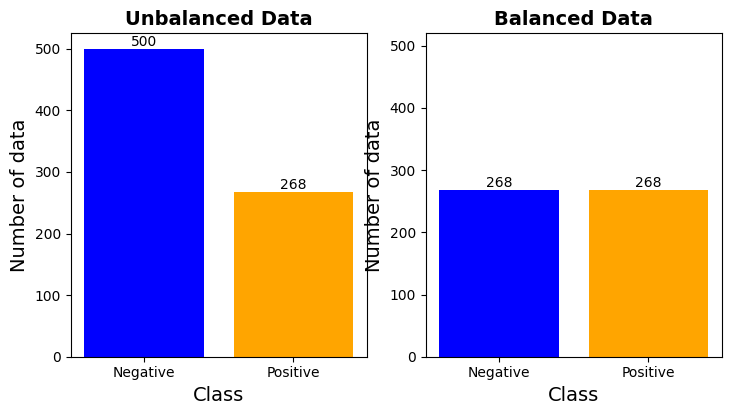

In [23]:
plt.figure(figsize = (8.4, 4.2))

plt.subplot(1, 2, 1)
x = ["Negative", "Positive"]
h = [500,268]
c = ['blue', 'orange']
bars = plt.bar(x, height = h, color = c)
plt.bar_label(bars)
plt.xlabel("Class", size=14)
plt.ylabel("Number of data", size=14)
plt.title("Unbalanced Data", size=14, fontweight='bold')


plt.subplot(1, 2, 2)
x = ["Negative", "Positive"]
h = [268,268]
c = ['blue', 'orange']
bars = plt.bar(x, height = h, color = c)
plt.bar_label(bars)
plt.ylim(0, 520)
plt.xlabel("Class", size=14)
plt.ylabel("Number of data", size=14)
plt.title("Balanced Data", size=14, fontweight='bold')


plt.show()

### 1.0.3 Data Scaling

Before Scaling

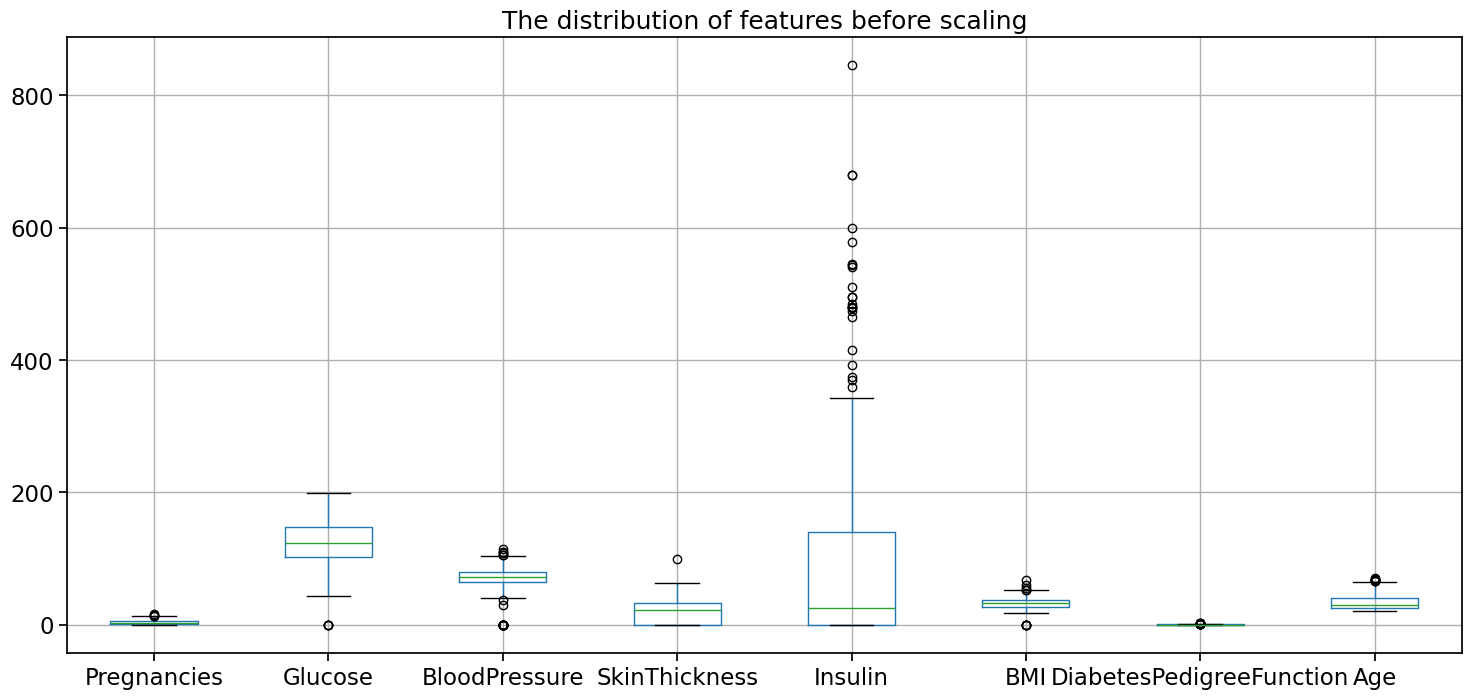

In [24]:
plt.figure(figsize=[18,8])
with sns.plotting_context("notebook",font_scale=1.5):
  df.boxplot(column=df.columns.values.tolist()[:-1])
  plt.title("The distribution of features before scaling")

After scaling

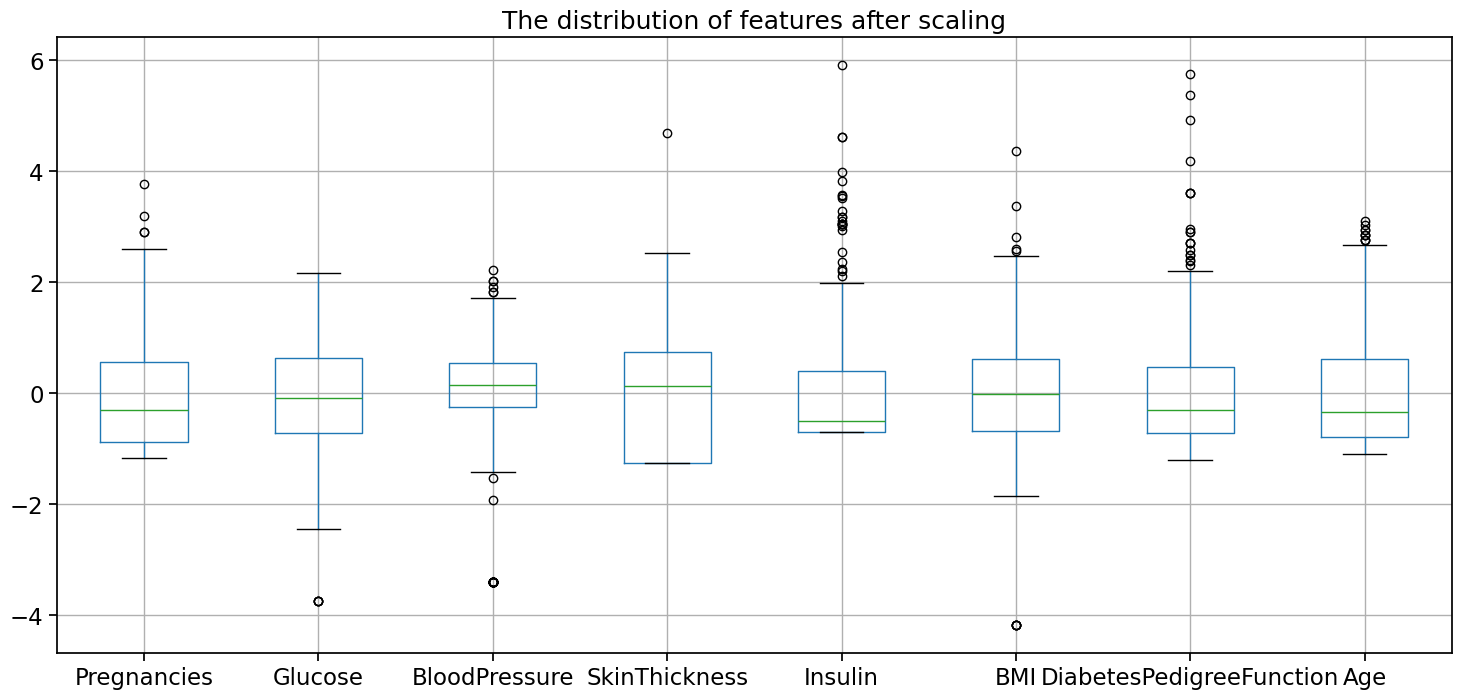

In [25]:
plt.figure(figsize=[18,8])
with sns.plotting_context("notebook",font_scale=1.5):
  data_scaling_plot(df).boxplot(column=df.columns.values.tolist()[:-1])
  plt.title("The distribution of features after scaling")

### 1.0.4 Data Visualization


#### 1.0.4.1 Visualization in 2D

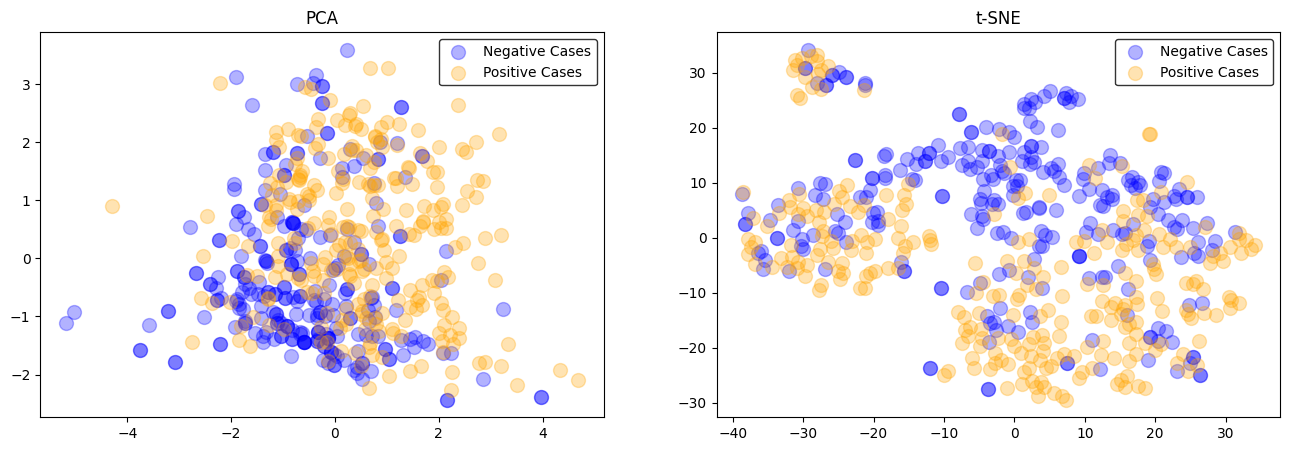

In [26]:
dim2(df, 100, 1)

In [27]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,184,85,15,0,30.0,1.213,49,1
1,0,138,60,35,167,34.6,0.534,21,1
2,6,166,74,0,0,26.6,0.304,66,0
3,0,95,85,25,36,37.4,0.247,24,1
4,0,131,0,0,0,43.2,0.270,26,1
...,...,...,...,...,...,...,...,...,...
531,0,125,96,0,0,22.5,0.262,21,0
532,5,104,74,0,0,28.8,0.153,48,0
533,3,116,74,15,105,26.3,0.107,24,0
534,1,135,54,0,0,26.7,0.687,62,0


In [28]:
df['Outcome'].unique()


array([1, 0])

In [29]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

## 1.0.5 DATA cleaning

In [30]:

def check_nulls(df):
    print(" Null values per column:")
    print(df.isnull().sum())

def check_duplicates(df):
    print("Number of duplicate rows:")
    print(df.duplicated().sum())

def check_outliers(df):
    print("Number of outliers per column:")
    numeric_df = df.select_dtypes(include=np.number)
    for col in numeric_df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        print(f"{col}: {len(outliers)}")

def handle_nulls(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype in ['float64', 'int64']:
                df[col].fillna(df[col].median(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)
    return df

def handle_duplicates(df):
    return df.drop_duplicates()

def handle_outliers(df):
    numeric_df = df.select_dtypes(include=np.number)
    for col in numeric_df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

def clean_and_check(df):
    print(" BEFORE CLEANING ")
    check_nulls(df)
    check_duplicates(df)
    check_outliers(df)

    df = handle_nulls(df)
    df = handle_duplicates(df)
    df = handle_outliers(df)

    print("AFTER ")
    check_nulls(df)
    check_duplicates(df)
    check_outliers(df)

    return df


In [31]:
df = clean_and_check(df)


 BEFORE CLEANING 
 Null values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Number of duplicate rows:
67
Number of outliers per column:
Pregnancies: 4
Glucose: 4
BloodPressure: 37
SkinThickness: 1
Insulin: 23
BMI: 10
DiabetesPedigreeFunction: 19
Age: 10
Outcome: 0
AFTER 
 Null values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Number of duplicate rows:
0
Number of outliers per column:
Pregnancies: 0
Glucose: 0
BloodPressure: 5
SkinThickness: 0
Insulin: 3
BMI: 0
DiabetesPedigreeFunction: 4
Age: 